In [1]:
import re
import us
import requests
import pandas as pd
import numpy as np
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
us.states.STATES
type(us.states.STATES)

list

In [3]:
#Using an API to retrieve data from open FEMA as the data changes weekly
response = requests.get("https://www.fema.gov/api/open/v2/EmergencyManagementPerformanceGrants")
print(response.status_code)

200


In [4]:
json = response.json()
json.keys()
json['metadata']
type(json['EmergencyManagementPerformanceGrants'])
json['EmergencyManagementPerformanceGrants'][0]

{'id': 'feba7d36-6c6c-4870-a6ba-7ae4d33d4070',
 'reportingPeriod': '2014 Close-Out',
 'state': 'Alabama',
 'legalAgencyName': 'Alabama Emergency Management Agency',
 'projectType': 'Develop/enhance plans, procedures, and protocols',
 'projectStartDate': '2014-10-01T00:00:00.000Z',
 'projectEndDate': '2016-10-01T00:00:00.000Z',
 'nameOfProgram': 'EMPG',
 'fundingAmount': 5795991}

In [5]:
empg = pd.DataFrame(json['EmergencyManagementPerformanceGrants'])
empg

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00
1,6a79936c-3e4e-4aa9-a3c4-869450a157cb,2014 Close-Out,Alaska,City and Borough of Juneau,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,110000.00
2,82225bd6-2ea4-4e24-bb71-661b39704e38,2014 Close-Out,Alaska,City of Cordova,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,18000.00
3,77625579-f849-4761-a4b3-0e78942fa6c6,2014 Close-Out,Alaska,City of Dillingham,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,2672.65
4,5c98fe41-8e6b-45ac-844f-d3f0ea457031,2014 Close-Out,Alaska,City of Fairbanks,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,10000.00
...,...,...,...,...,...,...,...,...,...
995,bc1b89f1-a54e-46e7-b8df-bad4aed1dd39,2014 Close-Out,Minnesota,Crow Wing County,Develop / enhance homeland security / emergenc...,2014-01-01T00:00:00.000Z,2014-12-01T00:00:00.000Z,EMPG,43973.00
996,6b97b158-64aa-48d7-a2a3-2e290bd4d4c1,2014 Close-Out,Minnesota,Dakota County,Develop / enhance homeland security / emergenc...,2014-01-01T00:00:00.000Z,2014-12-01T00:00:00.000Z,EMPG,57576.49
997,dd53f206-8ea9-4d87-9467-fdffaeb78f71,2014 Close-Out,Minnesota,Dodge County,Develop / enhance homeland security / emergenc...,2014-01-01T00:00:00.000Z,2014-12-01T00:00:00.000Z,EMPG,20564.00
998,0f5c3360-39a1-4125-929c-5597647b388c,2014 Close-Out,Minnesota,Douglas County,Develop / enhance homeland security / emergenc...,2014-01-01T00:00:00.000Z,2014-12-01T00:00:00.000Z,EMPG,14517.18


In [6]:
print (len(empg.state.unique()))
print (empg.state.unique())

21
['Alabama' 'Alaska' 'American Samoa' 'Arizona' 'Arkansas' 'California'
 'Colorado' 'District of Columbia' 'Florida' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Michigan' 'Minnesota']


#### Note: American Samoa is not merged in output dataframe


In [7]:
#these urls are accessible using us module
'''shpurls = us.states.MD.shapefile_urls()
for region, url in shpurls.items():
    print ("%s: %s" % (region, url))'''
#turns out the state one has only one row of data

'shpurls = us.states.MD.shapefile_urls()\nfor region, url in shpurls.items():\n    print ("%s: %s" % (region, url))'

In [8]:
state = gpd.read_file('data/cb_2018_us_state_20m/cb_2018_us_state_20m.shp')
state

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,24,01714934,0400000US24,24,MD,Maryland,00,25151100280,6979966958,"MULTIPOLYGON (((-76.04621 38.02553, -76.00734 ..."
1,19,01779785,0400000US19,19,IA,Iowa,00,144661267977,1084180812,"POLYGON ((-96.62187 42.77925, -96.57794 42.827..."
2,10,01779781,0400000US10,10,DE,Delaware,00,5045925646,1399985648,"POLYGON ((-75.77379 39.72220, -75.75323 39.757..."
3,39,01085497,0400000US39,39,OH,Ohio,00,105828882568,10268850702,"MULTIPOLYGON (((-82.86334 41.69369, -82.82572 ..."
4,42,01779798,0400000US42,42,PA,Pennsylvania,00,115884442321,3394589990,"POLYGON ((-80.51989 40.90666, -80.51964 40.987..."
5,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05314 41.11446, -104.05245 41.2..."
6,53,01779804,0400000US53,53,WA,Washington,00,172112588220,12559278850,"MULTIPOLYGON (((-123.23715 48.68347, -123.0704..."
7,72,01779808,0400000US72,72,PR,Puerto Rico,00,8868896030,4922382562,"MULTIPOLYGON (((-65.34207 18.34529, -65.25593 ..."
8,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
9,05,00068085,0400000US05,05,AR,Arkansas,00,134768872727,2962859592,"POLYGON ((-94.61792 36.49941, -94.36120 36.499..."


In [9]:
empg = empg.merge(state, left_on = 'state', right_on = 'NAME')
#empg.merge(state,indicator = True, left_on = 'state', right_on = 'NAME', how='left').loc[lambda x : x['_merge']!='both']

In [10]:
empg.head()

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,NAME,LSAD,ALAND,AWATER,geometry
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00,01,01779775,0400000US01,01,AL,Alabama,00,131174048583,4593327154,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
1,6a79936c-3e4e-4aa9-a3c4-869450a157cb,2014 Close-Out,Alaska,City and Borough of Juneau,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,110000.00,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
2,82225bd6-2ea4-4e24-bb71-661b39704e38,2014 Close-Out,Alaska,City of Cordova,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,18000.00,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
3,77625579-f849-4761-a4b3-0e78942fa6c6,2014 Close-Out,Alaska,City of Dillingham,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,2672.65,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
4,5c98fe41-8e6b-45ac-844f-d3f0ea457031,2014 Close-Out,Alaska,City of Fairbanks,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,10000.00,02,01785533,0400000US02,02,AK,Alaska,00,1478839695958,245481577452,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."


In [11]:
empg.columns

Index(['id', 'reportingPeriod', 'state', 'legalAgencyName', 'projectType',
       'projectStartDate', 'projectEndDate', 'nameOfProgram', 'fundingAmount',
       'STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')

In [12]:
empg.drop(columns = ['STATENS', 'AFFGEOID', 'GEOID', 'LSAD', 'ALAND', 'AWATER'], inplace = True)
empg.head()

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STUSPS,NAME,geometry
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00,01,AL,Alabama,"POLYGON ((-88.46866 31.89386, -88.46866 31.933..."
1,6a79936c-3e4e-4aa9-a3c4-869450a157cb,2014 Close-Out,Alaska,City and Borough of Juneau,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,110000.00,02,AK,Alaska,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
2,82225bd6-2ea4-4e24-bb71-661b39704e38,2014 Close-Out,Alaska,City of Cordova,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,18000.00,02,AK,Alaska,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
3,77625579-f849-4761-a4b3-0e78942fa6c6,2014 Close-Out,Alaska,City of Dillingham,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,2672.65,02,AK,Alaska,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."
4,5c98fe41-8e6b-45ac-844f-d3f0ea457031,2014 Close-Out,Alaska,City of Fairbanks,Establish/Enhance emergency plans and procedur...,2014-07-01T00:00:00.000Z,2015-06-01T00:00:00.000Z,EMPG,10000.00,02,AK,Alaska,"MULTIPOLYGON (((179.48132 51.97530, 179.58286 ..."


In [13]:
empg = gpd.GeoDataFrame(empg, geometry = 'geometry', crs="EPSG:4629")

In [14]:
#taking states within CONUS only
#define values of state to remove area other than CONUS
values = ['02', '15', '60', '66', '69', '72', '78']

#drop rows that contain any value in the list
empg = empg[empg.STATEFP.isin(values) == False]

In [15]:
#drop rows that contain any value in the list from state geodataframe to use only CONUS states in background map
state = state[state.STATEFP.isin(values) == False]

In [16]:
len (empg.state.unique())

18

#### Adding state population to normalize funding amount 

In [17]:
popn = pd.read_csv("data\\NSTEST2022ALLDATA.csv")
display (popn)
#print (popn.columns)

,SUMLEV,REGION,DIVISION,STATE,NAME,ESTIMATESBASE2020,POPESTIMATE2020,POPESTIMATE2021,POPESTIMATE2022,NPOPCHG_2020,...,RDEATH2021,RDEATH2022,RNATURALCHG2021,RNATURALCHG2022,RINTERNATIONALMIG2021,RINTERNATIONALMIG2022,RDOMESTICMIG2021,RDOMESTICMIG2022,RNETMIG2021,RNETMIG2022
0,10,0,0,0,United States,331449520,331511512,332031554,333287557,61992,...,10.363828,10.350218,0.434073,0.736729,1.133397,3.038912,0.000000,0.000000,1.133397,3.038912
1,20,1,0,0,Northeast Region,57609156,57448898,57259257,57040406,-160258,...,9.780142,9.868918,0.206629,0.511200,1.402708,3.752662,-4.855348,-8.061896,-3.452640,-4.309234
2,30,1,1,0,New England,15116206,15074473,15121745,15129548,-41733,...,9.530598,9.887115,-0.310502,-0.206669,1.770752,4.655140,1.546021,-3.767839,3.316773,0.887301
3,30,1,2,0,Middle Atlantic,42492950,42374425,42137512,41910858,-118525,...,9.869304,9.862369,0.391400,0.769581,1.271205,3.427836,-7.142565,-9.607444,-5.871360,-6.179608
4,20,2,0,0,Midwest Region,68985537,68961043,68836505,68787595,-24494,...,11.059195,11.169148,-0.207043,-0.125530,0.802714,2.111084,-2.645374,-2.529339,-1.842660,-0.418255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,40,4,9,53,Washington,7705247,7724031,7740745,7785786,18784,...,8.400898,9.117040,2.264113,1.737928,1.809144,4.831987,-1.990071,-0.461146,-0.180927,4.370841
62,40,3,5,54,West Virginia,1793755,1791420,1785526,1775156,-2335,...,15.341020,16.649619,-5.665727,-6.829029,0.406492,0.995877,1.602484,0.266241,2.008976,1.262118
63,40,2,3,55,Wisconsin,5893725,5896271,5880101,5892539,2546,...,10.496442,10.770227,-0.305357,-0.298659,0.541593,1.388643,-3.209987,1.300813,-2.668394,2.689456
64,40,4,8,56,Wyoming,576837,577605,579483,581381,768,...,10.706187,11.506947,-0.063954,-0.844199,0.233344,0.589216,3.085331,3.707583,3.318676,4.296800


In [18]:
#changing state and county code to str from obj type 
popn['STATE'] = popn['STATE'].astype('str')

#adding trailing zeros in state and county FIPS 
popn['STATE'] = popn['STATE'].str.zfill(2)

In [19]:
pop_estimate2021 = popn[['POPESTIMATE2021','STATE']]
pop_estimate2021.head()

,POPESTIMATE2021,STATE
0,332031554,00
1,57259257,00
2,15121745,00
3,42137512,00
4,68836505,00


In [20]:
empg = empg.merge(pop_estimate2021, left_on = 'STATEFP', right_on = 'STATE')
empg.head()

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STUSPS,NAME,geometry,POPESTIMATE2021,STATE
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00,01,AL,Alabama,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",5049846,01
1,11b9c679-fd67-41f9-aa0c-c61990109065,2014 Close-Out,Arizona,Arizona Division of Emergency Management/EMPG,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,6956206.87,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",7264877,04
2,c0e1053c-c704-498c-a287-c2883e5f2966,2014 Close-Out,Arizona,DEOBLIGATED ADEM EMPG funds,Establish / enhance sustainable Homeland Secur...,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,15954.13,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",7264877,04
3,dc2f0518-c016-4a52-bd20-c6d9d1fc5c6d,2014 Close-Out,Arkansas,Arkansas County Office of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,21373.18,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",3028122,05
4,a43add9c-b697-4442-b007-147898df9549,2014 Close-Out,Arkansas,Arkansas Division of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,2792604.38,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",3028122,05


In [21]:
empg['EMPGfundsPerThousand'] = (empg['fundingAmount']*1000)/empg['POPESTIMATE2021']
empg.head()

,id,reportingPeriod,state,legalAgencyName,projectType,projectStartDate,projectEndDate,nameOfProgram,fundingAmount,STATEFP,STUSPS,NAME,geometry,POPESTIMATE2021,STATE,EMPGfundsPerThousand
0,feba7d36-6c6c-4870-a6ba-7ae4d33d4070,2014 Close-Out,Alabama,Alabama Emergency Management Agency,"Develop/enhance plans, procedures, and protocols",2014-10-01T00:00:00.000Z,2016-10-01T00:00:00.000Z,EMPG,5795991.00,01,AL,Alabama,"POLYGON ((-88.46866 31.89386, -88.46866 31.933...",5049846,01,1147.755991
1,11b9c679-fd67-41f9-aa0c-c61990109065,2014 Close-Out,Arizona,Arizona Division of Emergency Management/EMPG,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,6956206.87,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",7264877,04,957.511995
2,c0e1053c-c704-498c-a287-c2883e5f2966,2014 Close-Out,Arizona,DEOBLIGATED ADEM EMPG funds,Establish / enhance sustainable Homeland Secur...,2014-10-01T00:00:00.000Z,2016-09-01T00:00:00.000Z,EMPG,15954.13,04,AZ,Arizona,"POLYGON ((-114.79968 32.59362, -114.80939 32.6...",7264877,04,2.196063
3,dc2f0518-c016-4a52-bd20-c6d9d1fc5c6d,2014 Close-Out,Arkansas,Arkansas County Office of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,21373.18,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",3028122,05,7.058229
4,a43add9c-b697-4442-b007-147898df9549,2014 Close-Out,Arkansas,Arkansas Division of Emergency Management,Establish/enhance emergency operations center,2014-10-01T00:00:00.000Z,2015-09-01T00:00:00.000Z,EMPG,2792604.38,05,AR,Arkansas,"POLYGON ((-94.61792 36.49941, -94.36120 36.499...",3028122,05,922.223206


C:\Users\bhandarir\Anaconda3\envs\try\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)
C:\Users\bhandarir\Anaconda3\envs\try\lib\site-packages\contextily\tile.py:581: UserWarning: The inferred zoom level of 22 is not valid for the current tile provider (valid zooms: 0 - 20).
  warnings.warn(msg)


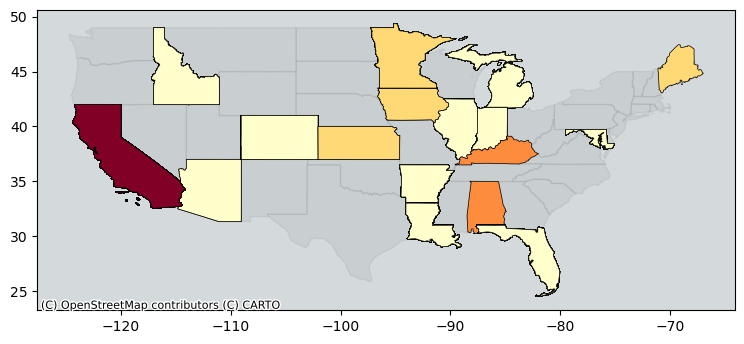

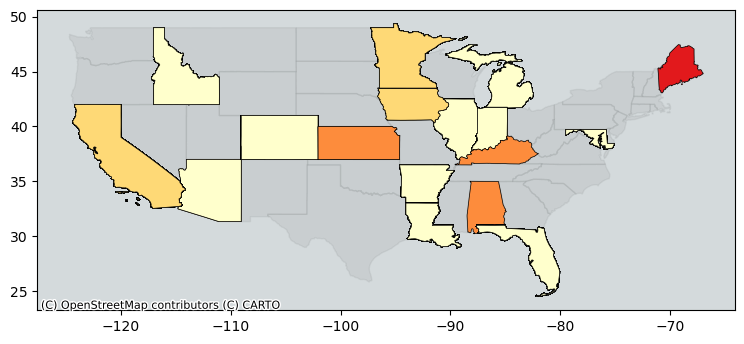

In [22]:

#plotting the amount of assistances across states
ax1 = state.plot( color='k', linewidth=1, figsize=(9,9), alpha = 0.05, edgecolor='k')
empg.plot(ax = ax1, column = 'fundingAmount', scheme='FisherJenks', cmap = 'YlOrRd', linewidth= 0.5, figsize=(9,9), edgecolor='k')
cx.add_basemap(ax1, source=cx.providers.CartoDB.Positron)

#plotting the Emergency Management Performance grant per thousands across states
ax2 = state.plot( color='k', linewidth=1, figsize=(9,9), alpha = 0.05, edgecolor='k')
empg.plot(ax = ax2, column = 'EMPGfundsPerThousand', scheme='FisherJenks', cmap = 'YlOrRd', linewidth= 0.5, figsize=(9,9), edgecolor='k')
cx.add_basemap(ax2, source=cx.providers.CartoDB.Positron)

### The map shows that Emergency Management Performance Grant per thopusand population is highest in the state of Maine. Even so, mapping only the fund amount shows california receiving the highest. 